# **Neural Networks with PyTorch**
Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we didi in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module `nn` that provides a nice way to efficiency build large neural networks.

In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

Now we're going to build a laarger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28 x 28 pixels, you can see a sample below
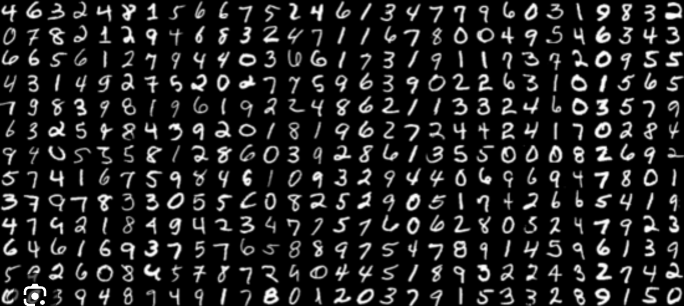

our goal is to build a neural network that can take one of these images and predit the digit in the image.

First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. Don't worry too much about the details here, you'll learn more about this later.

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                                ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.60MB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.02MB/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




### **1. Import Necessary Libraries**
```python
from torchvision import datasets, transforms
```
- `torchvision.datasets`: Provides easy access to datasets like MNIST.
- `torchvision.transforms`: Helps preprocess the dataset (e.g., converting images to tensors and normalizing them).

---

### **2. Define Transformations**
```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
```
- `transforms.Compose`: Chains multiple preprocessing steps.
- `transforms.ToTensor()`: Converts the image into a PyTorch tensor (from 0 to 1 range).
- `transforms.Normalize((mean), (std))`: Adjusts pixel values.  
   - The mean `(0.5, 0.5, 0.5)` and std `(0.5, 0.5, 0.5)` normalize values to a range of -1 to 1.

---

### **3. Load MNIST Dataset**
```python
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
```
- `datasets.MNIST`: Loads the MNIST dataset.
- `'~/.pytorch/MNIST_data/'`: Path to save the dataset locally.
- `download=True`: Downloads the dataset if not already available.
- `train=True`: Specifies loading the training set.
- `transform=transform`: Applies the preprocessing steps defined earlier.

---

### **4. Create DataLoader**
```python
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
```
- `torch.utils.data.DataLoader`: Prepares the dataset for training by splitting it into batches.
- `batch_size=64`: Each batch will have 64 images.
- `shuffle=True`: Randomizes the order of the data for each epoch, which helps prevent overfitting.

---

### **What Happens Here?**
- The MNIST dataset is downloaded and preprocessed.
- Each image is converted to a tensor and normalized.
- The `DataLoader` splits the data into shuffled batches of size 64 for training.

# **What is transforms.Compose() ?**
`transforms.Compose()` is a utility in PyTorch that combines multiple image transformation steps into a single operation. This allows you to apply a sequence of transformations (l
ike resizing, normalizing, or converting to a tensor) to your dataset in a defined order.

### **Why Use `Compose`?**
When working with image data, you often need to preprocess it (e.g., resizing, converting to tensor format, normalizing). Instead of applying these transformations one by one, `transforms.Compose()` lets you chain them together into one pipeline.

---

### **How It Works**
```python
transforms.Compose([
    transform1,
    transform2,
    transform3,
    ...
])
```
- The transformations inside the list are applied in sequence, from top to bottom.

---

### **Example**
```python
transform = transforms.Compose([
    transforms.ToTensor(),                     # Convert image to a tensor
    transforms.Normalize((0.5,), (0.5,)),     # Normalize pixel values
])
```
For MNIST (grayscale images):
1. `transforms.ToTensor()`: Converts the image into a PyTorch tensor with values between 0 and 1.
2. `transforms.Normalize((0.5,), (0.5,))`: Normalizes pixel values to the range [-1, 1].

---

### **Key Benefit**
You pass this composed transformation to the dataset:
```python
trainset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
```
This ensures that every image loaded from the dataset is automatically transformed before being used.


In [3]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])




### **1. `dataiter = iter(trainloader)`**
- `trainloader` is a `DataLoader` that provides batches of data.
- `iter(trainloader)` creates an **iterator**, allowing you to loop through batches of data manually.

---

### **2. `images, labels = next(dataiter)`**
- `next(dataiter)` fetches the next batch of data from the iterator.
- It returns two things:
  - `images`: A batch of input data (images).
  - `labels`: The corresponding labels (digits for the MNIST dataset).

---

### **3. `print(type(images))`**
- Prints the type of the `images` object.
- It will output `<class 'torch.Tensor'>` because the images are stored as PyTorch tensors.

---

### **4. `print(images.shape)`**
- Prints the shape of the `images` tensor.
- For example, if `batch_size=64` and each MNIST image is 28x28, the shape will be:
  ```
  torch.Size([64, 1, 28, 28])
  ```
  - `64`: Number of images in the batch.
  - `1`: Number of channels (1 for grayscale).
  - `28, 28`: Height and width of each image.

---

### **5. `print(labels.shape)`**
- Prints the shape of the `labels` tensor.
- It will output:
  ```
  torch.Size([64])
  ```
  - `64`: Number of labels (one for each image in the batch).

---

### **Key Insight**
- `images` contains the batch of image data.
- `labels` contains the corresponding batch of target labels (the digit each image represents).


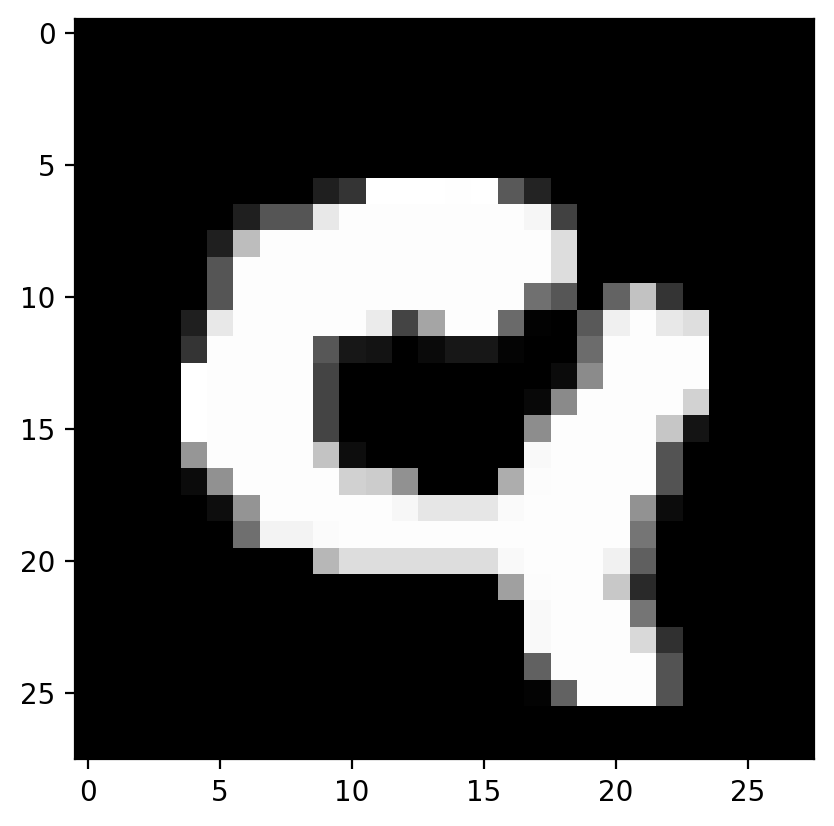

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

First, let's try to build a simple network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's `nn` module which provides a much more convenient and powerful method for defining network architectures.

The networks you've seen so far are called fully-connected or dense networks. Each unit in one layer is connected to each unit in the next layer. In fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into 2D tensor as a batch of multiple examples). However, our images are 28 x 28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape `(64, 1, 28, 28)` to a have a shape of `(64, 785)`, 784 is 28 times 28. This is typically called *flattening*. We flattened the 2D images into 1D vectors.

Previously you built a network with one output unit. Here we need 10 output units, one for each digit. we want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one ddigit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image. That means we need 10 output units for the 10 classes (digits). We'll see how to convert the network ouput into a probability distribution next.

In [6]:
import torch

def activation(x):
  return 1/(1+torch.exp(-x))

# flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

# Use torch.matmul for matrix multiplication instead of torch.nn
h = activation(torch.matmul(inputs, w1) + b1)

# Use torch.matmul for matrix multiplication instead of torch.nn
out = torch.matmul(h, w2) + b2



### **1. Activation Function**
```python
def activation(x):
    return 1 / (1 + torch.exp(-x))
```
- This is the **sigmoid activation function**.
- It takes an input tensor `x`, applies the sigmoid formula, and squashes the values into a range between 0 and 1.

---

### **2. Flatten the Input Images**
```python
inputs = images.view(images.shape[0], -1)
```
- `images.shape[0]`: The batch size (e.g., 64 images).
- `-1`: Flattens the rest of the dimensions. Since MNIST images are 28x28 pixels, this makes each image a vector of size 784 (`28*28`).
- The result is a 2D tensor of shape `(batch_size, 784)`.

---

### **3. Create Parameters**
```python
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)
```
- **`w1` and `b1`**: Weights and biases for the first layer.
  - `w1`: Maps 784 input features to 256 neurons in the hidden layer.
  - `b1`: Bias vector for the 256 neurons.
- **`w2` and `b2`**: Weights and biases for the second layer.
  - `w2`: Maps 256 hidden neurons to 10 output neurons (one for each digit, 0-9).
  - `b2`: Bias vector for the 10 output neurons.

---

### **4. First Layer Calculation**
```python
h = activation(torch.matmul(inputs, w1) + b1)
```
- **`torch.matmul(inputs, w1)`**: Matrix multiplication between the inputs (batch of flattened images) and the weights `w1`.
  - Result shape: `(batch_size, 256)`.
- **`+ b1`**: Adds the bias for each hidden neuron.
  - `b1` is automatically broadcasted across the batch.
- **`activation(...)`**: Applies the sigmoid function element-wise.
  - Output shape: `(batch_size, 256)`.

---

### **5. Second Layer Calculation**
```python
out = torch.matmul(h, w2) + b2
```
- **`torch.matmul(h, w2)`**: Matrix multiplication between the hidden layer outputs and the second layer weights `w2`.
  - Result shape: `(batch_size, 10)`.
- **`+ b2`**: Adds the bias for each output neuron.
  - Output shape: `(batch_size, 10)`.

---

### **Final Output**
- `out` is a tensor of shape `(batch_size, 10)`.
- Each row represents the **raw scores** (logits) for the 10 digit classes.

---

### **Key Idea**
- This is a manual implementation of a two-layer neural network with:
  - **Input layer**: 784 features (flattened pixels).
  - **Hidden layer**: 256 neurons.
  - **Output layer**: 10 neurons (one for each digit).
- The output `out` contains raw predictions, but you can apply a function like `softmax` to convert them into probabilities.


In [10]:
# or you can use torch.mm instead of torch.matmul

def activation(x):
  return 1/(1+torch.exp(-x))

# flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

# Use torch.matmul for matrix multiplication instead of torch.nn
h = activation(torch.mm(inputs, w1) + b1)

# Use torch.matmul for matrix multiplication instead of torch.nn
out = torch.mm(h, w2) + b2

In [11]:
print(out)

tensor([[-8.4385e+00,  2.4150e+01, -1.0405e+00,  6.0125e+00, -1.3722e+01,
          3.2610e+00,  1.8009e+00, -1.4859e+01,  8.0300e-01,  7.3039e-01],
        [-4.5068e+00,  1.7044e+01, -3.2191e+00,  3.5654e+00, -9.8220e+00,
          8.2689e+00,  1.7404e-01, -5.4005e+00, -1.4796e+01, -5.8197e+00],
        [-8.2288e+00,  2.1700e+01, -3.7263e+00, -4.5069e+00, -8.3017e+00,
         -4.2449e+00, -8.3645e+00, -9.5832e+00, -1.0876e+01, -7.5239e+00],
        [-4.4742e+00,  2.1350e+01, -4.9625e+00,  2.7674e+00, -1.0897e+01,
          6.7168e+00, -2.2773e-01, -1.6556e+01, -3.9672e+00, -1.2143e+01],
        [-1.2893e+01,  1.7144e+01, -2.1294e-02,  4.8029e+00, -1.0941e+01,
          3.5476e+00,  4.2252e+00, -1.3992e+01,  7.0694e-01,  3.6721e+00],
        [-8.8303e+00,  2.3691e+01, -4.0261e+00,  1.7084e+00, -1.6118e+01,
         -6.1499e-01,  1.1459e+00, -6.0813e+00, -8.4481e+00, -2.1048e+01],
        [-6.8725e+00,  1.3574e+01,  2.6655e+00,  4.3289e+00, -1.1676e+01,
         -8.1134e+00, -5.5154e+0

"Raw scores," also called **logits**, are the unprocessed outputs of the last layer of a neural network before any activation function like softmax or sigmoid is applied.

---

### **Why Are They Called "Raw Scores"?**
1. They are the direct results of the matrix multiplication and addition in the final layer:
   \[
   \text{logits} = X \cdot W + b
   \]
   where:
   - \( X \): Input from the previous layer.
   - \( W \): Weights of the final layer.
   - \( b \): Bias.

2. These scores are not normalized:
   - They can be positive or negative.
   - Their magnitude is not constrained to any range.

---

### **Example:**
For a batch of 3 images (`batch_size=3`), the output might look like this:
```plaintext
tensor([[ 2.3, -1.5,  0.8,  4.0, -0.2,  0.5,  3.1, -0.9,  2.8,  0.1],
        [-0.3,  1.2,  2.7, -1.8,  0.0,  3.4, -0.6,  1.8,  2.5, -0.7],
        [ 1.5,  3.2, -0.2,  0.4,  0.8, -1.3,  2.1,  1.1,  0.6,  2.9]])
```
- Each row contains 10 scores (one for each class in the dataset, e.g., digits 0-9 in MNIST).

---

### **What Do These Scores Mean?**
- They indicate how "confident" the model is about each class. Larger scores suggest higher confidence, but they are not probabilities.

### **Converting Logits to Probabilities**
To convert logits into interpretable probabilities:
1. Apply the **softmax function**:
   \[
   \text{softmax}(z_i) = \frac{\exp(z_i)}{\sum_{j} \exp(z_j)}
   \]
   - This ensures that:
     - All values are in the range [0, 1].
     - The sum of probabilities across all classes equals 1.
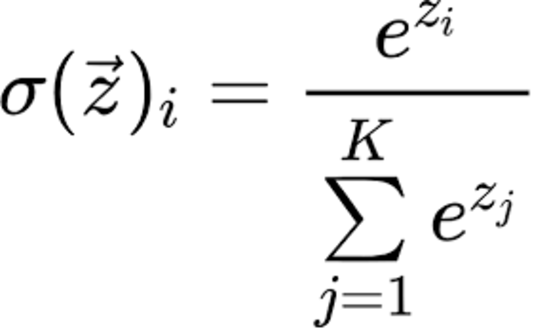

sigma	=	softmax

vec{z}	=	input vector

e^{z_{i}}	=	standard exponential function for input vector

K	=	number of classes in the multi-class classifier

e^{z_{j}}	=	standard exponential function for output vector

e^{z_{j}}	=	standard exponential function for output vector

---

### **Example Code:**
```python
import torch
import torch.nn.functional as F

# Example logits
logits = torch.tensor([[2.3, -1.5, 0.8, 4.0, -0.2, 0.5, 3.1, -0.9, 2.8, 0.1]])

# Convert to probabilities using softmax
probabilities = F.softmax(logits, dim=1)

print(probabilities)
```
Output:
```plaintext
tensor([[0.0151, 0.0003, 0.0055, 0.7527, 0.0024, 0.0042, 0.1577, 0.0010, 0.0584, 0.0026]])
```
- Now each value represents the probability of the image belonging to a specific class.

---

### **Key Takeaway:**
- **Raw scores (logits):** The unnormalized outputs of the network.
- **Probabilities:** Use softmax to convert logits into interpretable predictions.


In [12]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

print(probabilities.shape)

print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


This code implements a custom softmax function and applies it to the output logits (`out`) of your neural network. Let’s break it down step by step.

---

### **Softmax Function Implementation**
```python
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)
```
- **`torch.exp(x)`**: Exponentiates each element in the tensor `x` (logits).
- **`torch.sum(torch.exp(x), dim=1)`**: Computes the sum of the exponentiated values along each row (batch-wise sum for normalization).
  - `dim=1`: Sum along columns for each row.
- **`.view(-1, 1)`**: Reshapes the result to ensure proper broadcasting for division.
  - `-1` means "keep the batch size as it is."
  - `1` ensures it becomes a column vector for division.

---

### **Calculate Probabilities**
```python
probabilities = softmax(out)
```
- Converts raw logits (`out`) into probabilities.
- Each value in a row represents the predicted probability for a class, with all rows summing to 1.

---

### **Print Shape of Probabilities**
```python
print(probabilities.shape)
```
- If `out` has a shape of `(batch_size, 10)` (e.g., `(64, 10)`):
  - `probabilities.shape` will also be `(64, 10)` because softmax is applied independently to each row.

---

### **Check if Probabilities Sum to 1**
```python
print(probabilities.sum(dim=1))
```
- `probabilities.sum(dim=1)`: Sums the probabilities of each row (along the columns).
- The result should be a tensor of ones, meaning the probabilities for each sample sum to 1.

---

### **Expected Output**
For a batch size of 64:
1. **Shape of Probabilities:**
   ```
   torch.Size([64, 10])
   ```
   - 64 rows (one for each sample).
   - 10 columns (one for each class).

2. **Sum of Probabilities:**
   ```
   tensor([1., 1., 1., ..., 1.])
   ```
   - Each value in the tensor will be `1.0`.

---

### **Why Does This Work?**
The softmax function ensures that:
1. All values are in the range \([0, 1]\) (valid probabilities).
2. The sum of probabilities for each sample equals 1.


# **Building networks with PyTorch**
PyTorch provides a module `nn` that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output unit and a softmax output.

In [1]:
from torch import nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()

  # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)
    # output layer, 10 units - one for each digit
    self.output = nn.Linear(256, 10)

    # Define sigmoid activation and softmaz output
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

def forward(self, x):
  # pass the input tensor through each of out operations
  x = self.hidden(x)
  x = self.sigmoid(x)
  x = self.output(x)
  x = self.softmax(x)

  return x


### **Explanation of the Code**

1. **`__init__` Method:**
   - This is where we define the structure of the neural network.
   - `self.hidden = nn.Linear(784, 256)`:
     - First layer: Maps 784 input features (pixels of a flattened 28x28 image) to 256 neurons in the hidden layer.
   - `self.output = nn.Linear(256, 10)`:
     - Second layer: Maps 256 hidden neurons to 10 output neurons (one for each digit, 0-9).
   - Activation functions:
     - `self.sigmoid`: Applies the sigmoid activation function to the hidden layer.
     - `self.softmax`: Converts the final output logits into probabilities.

2. **`forward` Method:**
   - This defines the flow of data through the network during a forward pass.
   - The steps:
     1. Pass input through the hidden layer: `x = self.hidden(x)`.
     2. Apply the sigmoid activation: `x = self.sigmoid(x)`.
     3. Pass through the output layer: `x = self.output(x)`.
     4. Apply the softmax activation: `x = self.softmax(x)`.

3. **Return:**
   - The final output (`x`) contains probabilities for the 10 classes.

---

### **Example Usage**
```python
# Create an instance of the Network
model = Network()

# Create a dummy input tensor with a batch size of 64
input_data = torch.randn(64, 784)

# Perform a forward pass
output = model(input_data)

print("Output shape:", output.shape)  # Should be (64, 10)
print("Output probabilities (first sample):", output[0])
```

---

### **Expected Output**
- **Output shape:** `(64, 10)` for a batch of 64 samples and 10 output classes.
- **Output probabilities:** Each row will contain probabilities summing to 1 for the 10 classes.

In [2]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can define the network somewhat more concisely and clearly using the `torch.nn.functional` module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as `F`.`import torch.nn.functional as F`.

In [4]:
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Input to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one for each digit
    self.output = nn.Linear(256, 10)

  def forward(self, x) :
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))

    # Output layer with sofmax activation
    x = F.softmax(self.output(x), dim = 1)


    return x

# **Activation Functions**
So far we've only been looking at the softmax activation, but in general any function can be used as an activation function. The only requirement is that for a network to approximate a non-linear function, the activation functions must be non-linear. Here are a few more examples of common activation functions. Tanh (hyperbolic tangent) and ReLU (rectified linear Unit).

# **Practice**
**Input Layer** -> 784 <br>
**Hidden Layer1** -> 128 <br>
**Activation** -> RELU <br>
**Hidden Layer** -> 64 <br>
**Output** -> 10 <br>
**Activation** -> Softmax

In [6]:
import torch.nn as nn

class NewNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784, 128)
    self.hidden2 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim =1)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)
    x = self.relu()
    x = self.output(x)
    x = self.softmax(x)

    return x



In [7]:
model1 = NewNetwork()
model1

NewNetwork(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)